# 자료 구조 해쉬 테이블의 장단점과 주요 용도

+ 장점

    - 데이터 저장/읽기 속도가 매우 빠르다(검색 속도가 빠르다)
    - 해쉬는 키에 대한 데이터가 있는지 확인이 쉬움(중복 유무에 대해 다 찾아봐야하지만 해쉬테이블은 키값으로 주소 계산해서 거기에 있는지 없는지 확인만하면 됨)

+ 단점
    - 일반적으로 저장 공간이 좀 더 많이 필요하다 => 보통 해쉬 테이블은 앞의 노트의 테이블보다 더 크다.
        바로 아래 줄과 일맥상통
    - <span style='color:red'><b>여러 키에 해당하는 주소가 동일한 경우 충돌을 해결하기 위한 별도 자료구조가 필요함</b></span>
    
    
        예를 들어, 앞서 Andy는 키 값이 65였음 그런데 'Anthor' 이라는 이름도 키 값이 65기 때문에 동일한 슬롯에 데이터가 중복되게 됨.
        또는 key값을 앞서 5로 나눈 나머지엿는데 그 값이 같은경우도 존재할 것임. => 이러한 경우에 대응하는 법 중 간단한 것은 해쉬 테이블의 
        규모를 늘리는 것 =>  따라서 공간과 탐색 시간을 맞바꾸는 기법 
        
        
+ 주요 용도
    - 검색이 많이 필요한 경우
    - 저장, 삭제, 읽기가 빈번한 경우
    - 캐쉬 구현시(중복 확인이 쉽기 때문)
    
        예를 들어 웹 브라우저에 네이버를 들어간다 치면 매번 리프레쉬하면 오래걸리기 때문에 늘 쓰이는 유사 배너, 사진, 그림등은 pc에 저장해놓고 
        중복확인을 하여 가져다 씀.

# 프로그래밍 연습

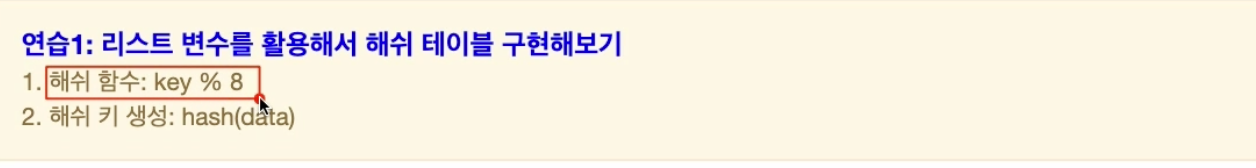

In [2]:
#내장된 해쉬 키 생성 method
hash('Dave')

-5622793543580696509

In [3]:
hash_table = list([0 for i in range(8)])

#hash 키 생성함수
def get_key(data):
    return hash(data)

#주소값 생성함수
def hash_function(key):
    return key % 8

#저장함수
def save_data(data, value):
    hash_address = hash_function(get_key(data))
    hash_table[hash_address] = value

#값 읽어오는 함수
def read_data(data):
    #읽어올 주소를 생성
    hash_address = hash_function(get_key(data))
    
    return hash_table[hash_address]

In [6]:
save_data('Dave', '0102030200')
save_data('Andy', '01033232200')
read_data('Dave')

'01033232200'

In [8]:
save_data('Dave', '0102030200')

In [9]:
hash_table

[0, 0, 0, '0102030200', 0, 0, 0, 0]

지금 이번에 실행시켰더니 신기한 일이 생김
이렇게 나왔는데 이건 'Dave'의 주소값과 'Andy'의 주소값이 동일하기 때문에 나중에 저장되는 'Andy'에 대한 정보만 저장된 것
내장 hash() 값은 주피터노트북 껐다 킬때마다 달라진다하니 나중에 실행시키면 또 달라질 수도 있음
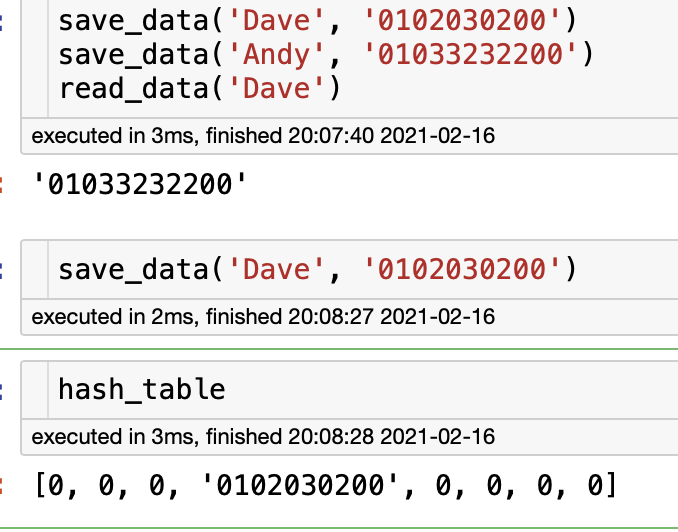


# 충돌(Collision) 해결 알고리즘 (좋은 해쉬 함수 사용하기)

한 개 이상의 데이터가 동일한 해쉬 주소에 저장되어야 하는 경우를 '충돌', '해쉬 충돌'이라고 한다.

해결법
1. Open Hashing(개방 해슁) : 충돌이 생기면 그 값은 해쉬 테이블 저장 공간 외의 추가적인 데이터 공간에 저장하는 방법

2. Close Hashing(폐쇄 해슁) : 충돌이 생기면 해쉬 테이블 안의 빈 공간을 찾아서 저장하는 기법

## Chaining 기법( Open Hashing 기법 중 하나)

충돌이 일어나면 Linked List 구조를 이용해서 데이터를 추가적으로 연결시키는 방법
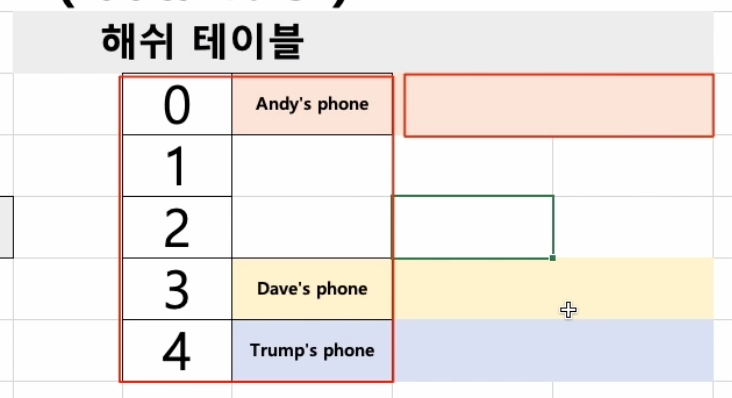

In [1]:
hash_table = list([0 for i in range(8)])

#hash 키 생성함수
def get_key(data):
    return hash(data)

#주소값 생성함수
def hash_function(key):
    return key % 8

#저장함수
def save_data(data, value): 
    #새롭게 추가된 부분. 만약 key 값이 9, 19이라면 주소값이 동일하게 되는데 그 경우 한 행에 이어진 해쉬테이블 + 링크드리스트 에서 어떤 것이
    #원하는 것인지 구분해주기 위해 저장을 할 때 key값도 같이 저장해주기 위해 index_key라는 별도 변수로 저장해준다.
    index_key = get_key(data)
    
    hash_address = hash_function(index_key)
    if hash_table[hash_address] != 0: #자리에 이미 값이 들어있다면(default 값이 0이니까)
        for index in range(len(hash_table[hash_address])): #linkedlist구현대신 리스트를 사용하기위함.
            if hash_table[hash_address][index][0] == index_key:
                hash_table[hash_address][index][1] = value
                return
        hash_table[hash_address].append([index_key, value])
    else:
        hash_table[hash_address] = [[index_key,value]]

#값 읽어오는 함수
def read_data(data):
    index_key = get_key(data)
    #읽어올 주소를 생성
    hash_address = hash_function(index_key)
    if hash_table[hash_address] != 0:
        for index in range(len(hash_table[hash_address])):
            if hash_table[hash_address][index][0] == index_key:
                return hash_table[hash_address][index][1]
        return None
    else:
        return None
    
    return hash_table[hash_address]

아래 그림과 같이 저장하겠다는 뜻
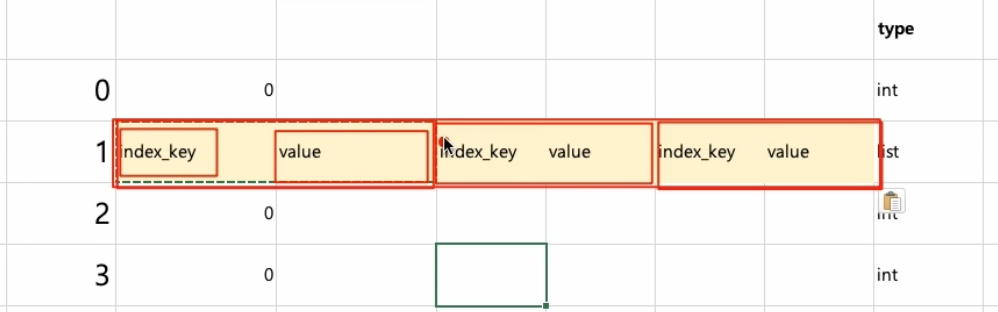

In [20]:
#test
#둘 다 3으로 동일
hash('Dave') % 8
hash('Dam') % 8

3

In [24]:
save_data('Dave','121212')
save_data('Dam','2323')
read_data('Dam')

'2323'

In [26]:
hash_table #앞이 키 값, 뒤가 데이터 값

[0,
 0,
 0,
 [[-5622793543580696509, '121212'], [-2909145354363898613, '2323']],
 0,
 0,
 0,
 0]